In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.shape

(250, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              250 non-null    int64 
 1   Gender                  250 non-null    object
 2   Age                     250 non-null    int64 
 3   Annual Income (k$)      250 non-null    int64 
 4   Spending Score (1-100)  250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB


In [14]:
X = df.iloc[:,3:].values

In [17]:
#bi variate analysis
#both columns are continous variables
#scatterplot

In [18]:
#correlation analysis

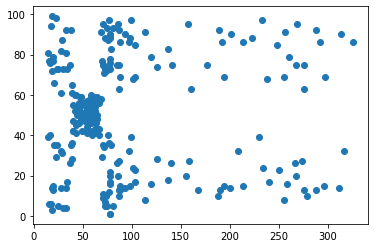

In [22]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [24]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.058195,0.867164,0.012075
Age,-0.058195,1.000000,-0.060257,-0.359084
Annual Income (k$),0.867164,-0.060257,1.000000,0.011343
Spending Score (1-100),0.012075,-0.359084,0.011343,1.000000


In [25]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.49200,95.592000,50.244000
std,72.312977,13.17026,77.308758,27.289914
min,1.000000,18.00000,15.000000,1.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,36.00000,70.000000,50.000000
75%,187.750000,47.75000,101.000000,74.000000
max,250.000000,70.00000,325.000000,99.000000


In [28]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_new = st.fit_transform(X)

In [29]:
#if I applied StandardScaler, it has just scaled the values not changed the values

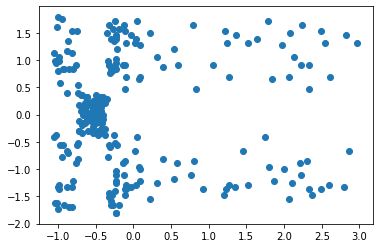

In [31]:
plt.scatter(X_new[:,0],X_new[:,1])
plt.show()

In [35]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=4)
kmean.fit(X_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
X_new[:10]

array([[-1.04456042, -0.41284687],
       [-1.04456042,  1.12927057],
       [-1.03159933, -1.62451058],
       [-1.03159933,  0.98240225],
       [-1.01863824, -0.37612979],
       [-1.01863824,  0.94568516],
       [-1.00567714, -1.62451058],
       [-1.00567714,  1.60659264],
       [-0.99271605, -1.73466182],
       [-0.99271605,  0.79881684]])

In [39]:
predict = kmean.predict(X_new)

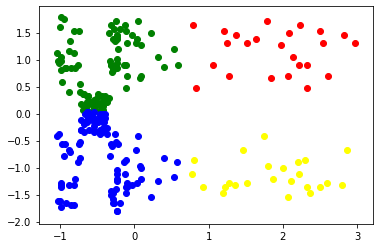

In [54]:
plt.scatter(X_new[predict==0][:,0],X_new[predict==0][:,1],c="green")
plt.scatter(X_new[predict==1][:,0],X_new[predict==1][:,1],c="yellow")
plt.scatter(X_new[predict==2][:,0],X_new[predict==2][:,1],c="blue")
plt.scatter(X_new[predict==3][:,0],X_new[predict==3][:,1],c="red")

In [55]:
#to find the best value of K
#elbow method

In [58]:
k_inertia = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit(X_new)
    k_inertia.append(km.inertia_)

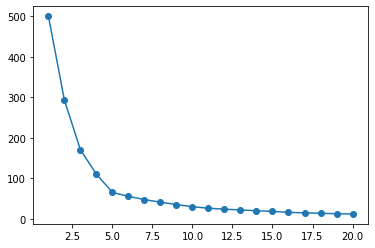

In [60]:
plt.scatter(range(1,21),k_inertia)
plt.plot(range(1,21),k_inertia)
plt.show()

In [61]:
#by using elbow method we got to know that the optimal value for k=5
#so we are building our model with 5 number of cluster

In [62]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=5)
kmean.fit(X_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [64]:
predict_new = kmean.predict(X_new)

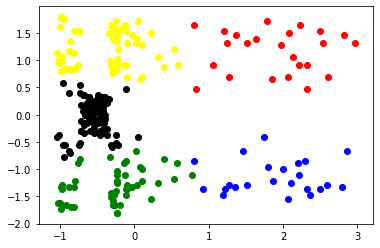

In [66]:
plt.scatter(X_new[predict_new==0][:,0],X_new[predict_new==0][:,1],c="green")
plt.scatter(X_new[predict_new==1][:,0],X_new[predict_new==1][:,1],c="yellow")
plt.scatter(X_new[predict_new==2][:,0],X_new[predict_new==2][:,1],c="blue")
plt.scatter(X_new[predict_new==3][:,0],X_new[predict_new==3][:,1],c="red")
plt.scatter(X_new[predict_new==4][:,0],X_new[predict_new==4][:,1],c="black")

In [67]:
#iris dataset
#sl,sw,pl,pw

In [ ]:
#all features,
#gender categorical encoding, age,amount,spending